In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails = json.load(open("kaggle.json"))

In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:21<00:00, 216MB/s]
100% 2.04G/2.04G [00:21<00:00, 100MB/s]


In [ ]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'color', 'segmented']
38
['Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___healthy', 'Squash___Powdery_mildew']
38
['Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___healthy', 'Squash___Powdery_mildew']
38
['Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___healthy', 'Squash___Powdery_mildew']


In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['1725a647-0866-45be-bd9f-e5add660c340___Mt.N.V_HL 9083.JPG', '6dc550f9-1939-4184-8efd-4afd6508ae3c___Mt.N.V_HL 9026.JPG', '3c75e76c-2e1f-478f-aadc-f3decb68c9b0___Mt.N.V_HL 6108.JPG', '00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '8f2cf5e7-ee7e-4a6e-84d2-5ac4bdb2e33f___Mt.N.V_HL 6099.JPG']


In [ ]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


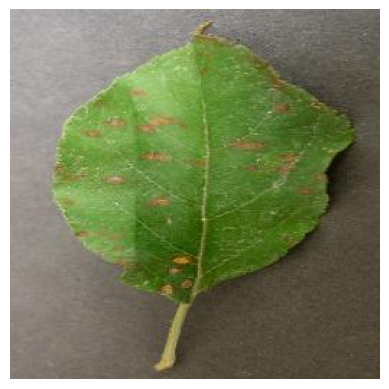

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'
# Read the image
img = mpimg.imread(image_path)
print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [ ]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 115s 79ms/step - accuracy: 0.6068 - loss: 1.8585 - val_accuracy: 0.8481 - val_loss: 0.4764
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.9970
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 133s 77ms/step - accuracy: 0.9191 - loss: 0.2571 - val_accuracy: 0.8614 - val_loss: 0.4711
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 4.7684e-07
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 91s 67ms/step - accuracy: 0.9677 - loss: 0.1006 - val_accuracy: 0.8769 - val_loss: 0.4473


In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8789 - loss: 0.4379
Validation Accuracy: 87.69%


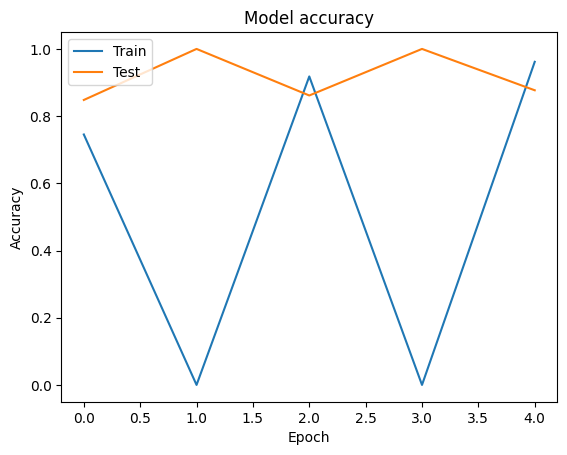

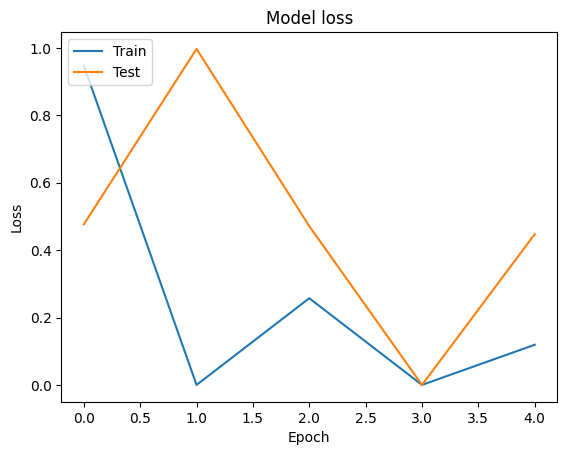

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
image_path = '/content/test_apple_black_rot.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Predicted Class Name: Apple___Black_rot


In [ ]:
model.save('drive/MyDrive/trained_models/plant_disease_prediction_model.h5')

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.save('plant_disease_prediction_model.h5')

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/plant_disease_descriptions.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/plant_disease_descriptions.csv'

**Hugging Face**

In [ ]:
from huggingface_hub import notebook_login

# Login to Hugging Face in the notebook
notebook_login()

In [ ]:
from transformers import pipeline
from huggingface_hub import login

# Login using the token directly
login(token="")


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


**Displays Description**

In [ ]:
from transformers import pipeline

# Load the GPT-2 model with GPU support (if available)
generator = pipeline('text-generation', model='gpt2', device=-1)  # Use device=0 for GPU, device=-1 for CPU

def generate_disease_description(disease_name):
    prompt = f"Provide a detailed description of the plant disease '{disease_name}', including symptoms, causes, and treatment methods. Focus on the disease's effects on plants."
    description = generator(prompt, max_length=200, num_return_sequences=1, truncation=True)
    return description[0]['generated_text']
# Example usage
predicted_disease = "early_blight"
description = generate_disease_description(predicted_disease)
print(description)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Provide a detailed description of the plant disease 'early_blight', including symptoms, causes, and treatment methods. Focus on the disease's effects on plants. Provide a description of any symptoms. Do not assume that there are no symptoms or that there is no direct proof of the disease that may have occurred. Identify plants that may be in contact with 'early_blight'. Identify a plant in close proximity either with an infected or damaged plant. Give the plant a name and photograph before you begin to describe symptoms and help you identify the person who may have tested positive for the disease. Describe the effects of contamination on the leaves, fruit and/or pet. Provide laboratory test results.

(b) Do not contact plants that are infected or damaged without first obtaining a DNA sample. The person who is testing positive may have been exposed to early bloom plants. This can affect the appearance of the first trichomonites (pigweed) in early bloom plants,


In [ ]:
# Example usage
predicted_disease = "early_blight"
description = generate_disease_description(predicted_disease)
print(description)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Provide a detailed description of the plant disease 'early_blight', including symptoms, causes, and treatment methods. Focus on the disease's effects on plants.

Use a case or sequence with specific details (for example: cause or severity of infection or other specific disease) and focus on the root and trout.

Contribute documentation (if necessary) that contains sufficient details (e.g., disease, strain, strain type, or species) to describe the plant in detail, including treatment and control, and details necessary to identify any appropriate control programs or methods, and to discuss further options that may be available.

Identify the species and cultivar in sufficient detail to identify any appropriate treatment or control programs for the specific specific disease, disease, or species.

Identify available and likely available strains of the disease, with a plan for effective management based on clinical data and the availability of the appropriate types, for specific strains of 

**text-to-speech**

In [ ]:
generator.save_pretrained('gpt2_text_generator')

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 50, 'do_sample': True}


In [ ]:
!pip install gtts
import pandas as pd
from gtts import gTTS
import os
# Load the CSV file
def load_disease_data(csv_file):
    df = pd.read_csv(csv_file)
    return df.set_index('disease_name').to_dict('index')
# Generate disease description from data
def generate_disease_description(disease_name, data):
    if disease_name in data:
        disease_info = data[disease_name]
        description = (f"Symptoms: {disease_info['symptoms']}. "
                       f"Causes: {disease_info['causes']}. "
                       f"Treatments: {disease_info['treatments']}.")
    else:
        description = "Description not available for this disease."
    return description
# Convert text to speech
def text_to_speech(text, filename='output.mp3'):
    tts = gTTS(text=text, lang='en', slow=False)
    tts.save(filename)
    os.system(f"start {filename}")
# Example usage
csv_file = '/content/sam.csv'  # Update this to your CSV file path
disease_data = load_disease_data(csv_file)
disease_name = "Early Blight Potato"  # Example disease name
description = generate_disease_description(disease_name, disease_data)
full_text = f"Disease: {disease_name}. Description: {description}"
text_to_speech(full_text, 'disease_description_sam.mp3')

**question-answering** (user input)

In [ ]:
import pandas as pd
from transformers import pipeline
# Load the CSV file
def load_disease_data(csv_file):
    df = pd.read_csv(csv_file)
    disease_data = {}
    for _, row in df.iterrows():
        disease_data[row['disease_name']] = {
            "symptoms": row['symptoms'],
            "causes": row['causes'],
            "treatments": row['treatments']
        }
    return disease_data
# Initialize the question-answering pipeline
qa_pipeline = pipeline("question-answering")
# Get disease information and answer the question
def get_disease_info(disease_name, question, data):
    context = data.get(disease_name, {})
    if not context:
        return "Disease information not found."
    context_text = (
        f"The symptoms of {disease_name} are: {context.get('symptoms', 'Not available')}.\n"
        f"The causes of {disease_name} include: {context.get('causes', 'Not available')}.\n"
        f"The treatments for {disease_name} are: {context.get('treatments', 'Not available')}."
    )
    result = qa_pipeline(question=question, context=context_text)
    return result['answer']
# Example usage
csv_file = '/content/sam.csv'  # Update this to your actual CSV file path
disease_data = load_disease_data(csv_file)

disease_name = "Early Blight Tomato"  # Example disease name
question = "What are the symptoms?"  # Example question
answer = get_disease_info(disease_name, question, disease_data)
print(f'Answer: {answer}')

question = "What are the treatments?"
answer = get_disease_info(disease_name, question, disease_data)
print(f'Answer: {answer}')

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Answer: Small, circular, water-soaked spots on leaves
Answer: Apply fungicides, use resistant varieties


In [ ]:
qa_pipeline.save_pretrained('qa_pipeline')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Path in Google Drive
model_save_path = '/content/drive/MyDrive/models/'

# Save the GPT-2 model and tokenizer to Google Drive
generator.save_pretrained(f'{model_save_path}gpt2_text_generator')
# Save the Question-Answering model
qa_pipeline.save_pretrained(f'{model_save_path}qa_pipeline')

# # If you want to save the CNN model
# cnn_model.save(f'{model_save_path}model.h5')


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 50, 'do_sample': True}


Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
from transformers import pipeline, GPT2LMHeadModel, GPT2Tokenizer
from gtts import gTTS
import os
import pandas as pd
# Load the CNN model (for image predictions)
cnn_model = load_model('plant_disease_prediction_model.h5')
# Load the text generation model (for disease description generation)
generator = pipeline('text-generation', model=GPT2LMHeadModel.from_pretrained('gpt2_text_generator'),
                     tokenizer=GPT2Tokenizer.from_pretrained('gpt2_text_generator'))

# Load the question-answering model (for Q&A about plant diseases)
qa_pipeline = pipeline('question-answering', model='qa_pipeline', tokenizer='qa_pipeline')
# Function to load disease data
def load_disease_data(csv_file):
    df = pd.read_csv(csv_file)
    disease_data = {}
    for _, row in df.iterrows():
        disease_data[row['disease_name']] = {
            "symptoms": row['symptoms'],
            "causes": row['causes'],
            "treatments": row['treatments']
        }
    return disease_data
# Function to generate a description
def generate_description(disease_name):
    prompt = f"Provide a detailed description of the plant disease '{disease_name}', including symptoms, causes, and treatment methods."
    description = generator(prompt, max_length=200, num_return_sequences=1, truncation=True)
    return description[0]['generated_text']
# Function to convert text to speech
def text_to_speech(text, filename='output1.mp3'):
    tts = gTTS(text=text, lang='en', slow=False)
    tts.save(filename)
    os.system(f"start {filename}")
# Function to answer questions
def answer_question(disease_name, question, data):
    context = data.get(disease_name, {})
    if not context:
        return "Disease information not found."
    context_text = (
        f"The symptoms of {disease_name} are: {context.get('symptoms', 'Not available')}.\n"
        f"The causes of {disease_name} include: {context.get('causes', 'Not available')}.\n"
        f"The treatments for {disease_name} are: {context.get('treatments', 'Not available')}."
    )
    result = qa_pipeline(question=question, context=context_text)
    return result['answer']

# Example usage
csv_file = '/content/sam.csv'  # Update this to your CSV file path
disease_data = load_disease_data(csv_file)

disease_name = "Black Rot"
description = generate_description(disease_name)
text_to_speech(description)

question = "What are the symptoms?"
answer = answer_question(disease_name, question, disease_data)
print(f"Answer: {answer}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Answer: Dark, sunken lesions on fruit


In [ ]:
from tensorflow.keras.models import load_model
from transformers import pipeline, GPT2LMHeadModel, GPT2Tokenizer
from gtts import gTTS
import os
import pandas as pd

# Load the CNN model (for image predictions)
cnn_model = load_model('plant_disease_prediction_model.h5')

# Load the text generation model (for disease description generation)
generator = pipeline('text-generation', model=GPT2LMHeadModel.from_pretrained('gpt2'),
                     tokenizer=GPT2Tokenizer.from_pretrained('gpt2'), device=0)  # Use GPU if available

# Load the question-answering model (for Q&A about plant diseases)
qa_pipeline = pipeline('question-answering', model='distilbert-base-uncased-distilled-squad', tokenizer='distilbert-base-uncased-distilled-squad')

# Load disease data from CSV
def load_disease_data(csv_file):
    df = pd.read_csv(csv_file)
    disease_data = {}
    for _, row in df.iterrows():
        disease_data[row['disease_name']] = {
            "symptoms": row['symptoms'],
            "causes": row['causes'],
            "treatments": row['treatments']
        }
    return disease_data

# Function to generate a description
def generate_description(disease_name):
    prompt = f"Provide a detailed description of the plant disease '{disease_name}', including symptoms, causes, and treatment methods."
    description = generator(prompt, max_length=200, num_return_sequences=1, truncation=True)
    return description[0]['generated_text']

# Function to convert text to speech
def text_to_speech(text, filename='output2.mp3'):
    tts = gTTS(text=text, lang='en', slow=False)
    tts.save(filename)
    os.system(f"start {filename}")

# Function to answer questions
def answer_question(disease_name, question, data):
    context = data.get(disease_name, {})
    if not context:
        return "Disease information not found."

    context_text = (
        f"The symptoms of {disease_name} are: {context.get('symptoms', 'Not available')}.\n"
        f"The causes of {disease_name} include: {context.get('causes', 'Not available')}.\n"
        f"The treatments for {disease_name} are: {context.get('treatments', 'Not available')}."
    )
    result = qa_pipeline(question=question, context=context_text)
    return result['answer']

# Example usage
csv_file = '/content/sam.csv'  # Update this to your CSV file path
disease_data = load_disease_data(csv_file)

disease_name = "Black Rot"
description = generate_description(disease_name)
text_to_speech(description)

question = "What are the symptoms?"
answer = answer_question(disease_name, question, disease_data)
print(f"Answer: {answer}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Answer: Dark, sunken lesions on fruit
